# Final Report

Transplant the necessary code from `eda.ipynb` to this notebook, and clean everything up for presentation!

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np


airline_delays = pd.read_csv('data/airline_delays_1_year.csv')
airline_delays['date'] = pd.to_datetime(airline_delays['month'], format='%Y-%m')

arriving_flights = airline_delays.dropna(how='any', subset=['arr_flights'])

df = airline_delays.dropna(how='any', subset=['arr_flights'])

def check_null_values(df):
    if df.isnull().values.any():
        display(df.isnull().sum())
    else:
        display("Null values don't exist")

# This is a pie chart showing the Top Airports with the most arrivals

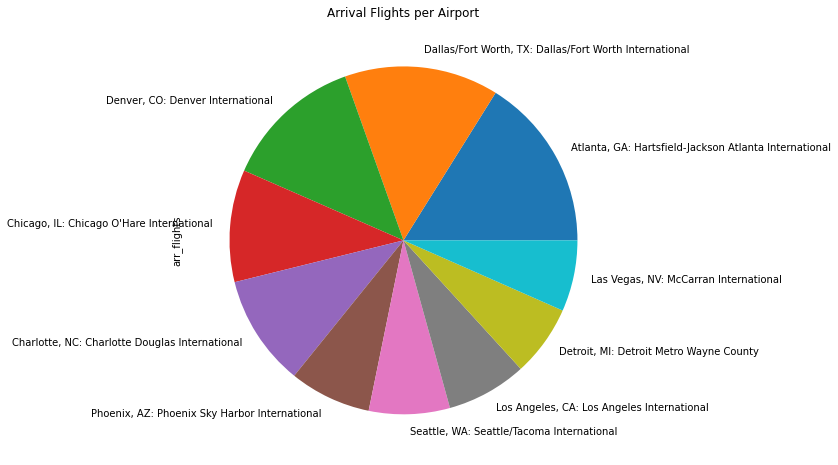

In [20]:
ax = (
    airline_delays
    .groupby('airport_name')
    .arr_flights
    .sum() 
    .sort_values(ascending=False) 
    .head(10) 
    .plot(
        kind='pie',
        figsize=(20,8),
        title='Arrival Flights per Airport',
    )
)

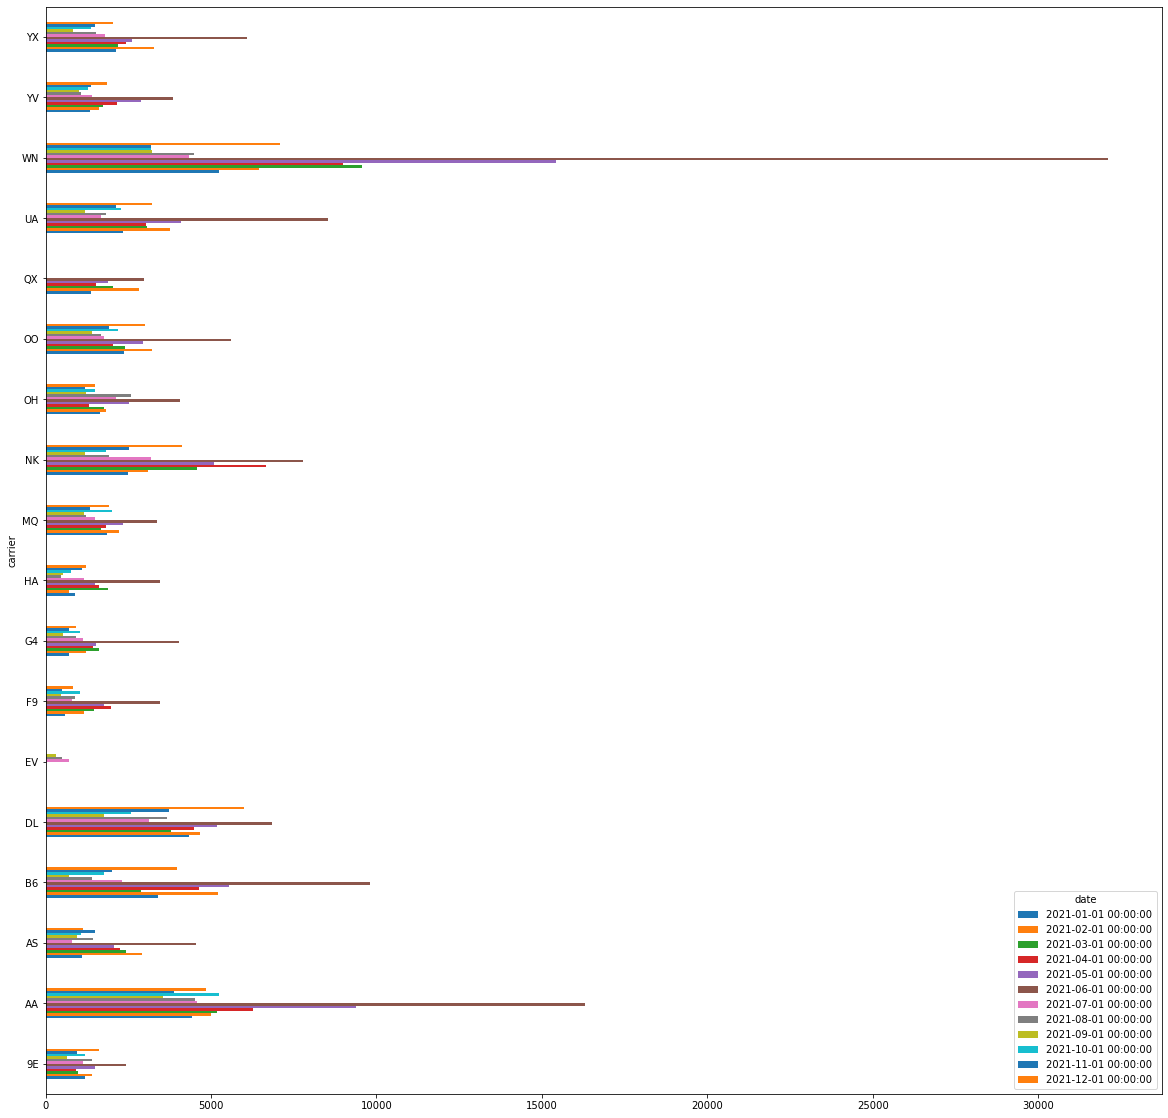

In [16]:
carrier_delay_by_month = pd.pivot_table(airline_delays, index="carrier", columns="date", values="arr_del15", 
                                        aggfunc=lambda x: (np.sum(x) * 100) / len(x))
carrier_delay_by_month.plot(kind='barh', figsize=(20,20));

<AxesSubplot:>

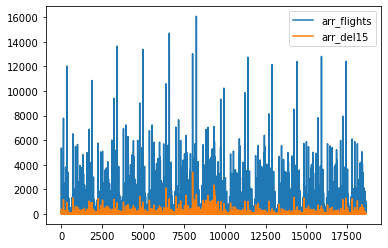

In [17]:
delay_df = arriving_flights[['carrier_name', 'airport_name', 'arr_flights', 'arr_del15']]
delay_df.plot()